KNN Accuracy (k=3): 0.83

Classification Report (k=3):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      0.67      0.71         9
           2       0.75      0.82      0.78        11

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30


Confusion Matrix (k=3):
 [[10  0  0]
 [ 0  6  3]
 [ 0  2  9]]


C:\Users\asus\AppData\Local\Temp\ipykernel_8656\784170600.py:60: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i, 1].scatter(X_test[~correct, 0], X_test[~correct, 1], c=y_pred[~correct], marker='x', label="Incorrect Predictions", cmap="coolwarm", s=100, edgecolors="black")


KNN Accuracy (k=5): 0.77

Classification Report (k=5):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.60      0.67      0.63         9
           2       0.70      0.64      0.67        11

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.77      0.77      0.77        30


Confusion Matrix (k=5):
 [[10  0  0]
 [ 0  6  3]
 [ 0  4  7]]


C:\Users\asus\AppData\Local\Temp\ipykernel_8656\784170600.py:60: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i, 1].scatter(X_test[~correct, 0], X_test[~correct, 1], c=y_pred[~correct], marker='x', label="Incorrect Predictions", cmap="coolwarm", s=100, edgecolors="black")


KNN Accuracy (k=12): 0.70

Classification Report (k=12):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.50      0.67      0.57         9
           2       0.62      0.45      0.53        11

    accuracy                           0.70        30
   macro avg       0.71      0.71      0.70        30
weighted avg       0.71      0.70      0.70        30


Confusion Matrix (k=12):
 [[10  0  0]
 [ 0  6  3]
 [ 0  6  5]]


C:\Users\asus\AppData\Local\Temp\ipykernel_8656\784170600.py:60: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i, 1].scatter(X_test[~correct, 0], X_test[~correct, 1], c=y_pred[~correct], marker='x', label="Incorrect Predictions", cmap="coolwarm", s=100, edgecolors="black")


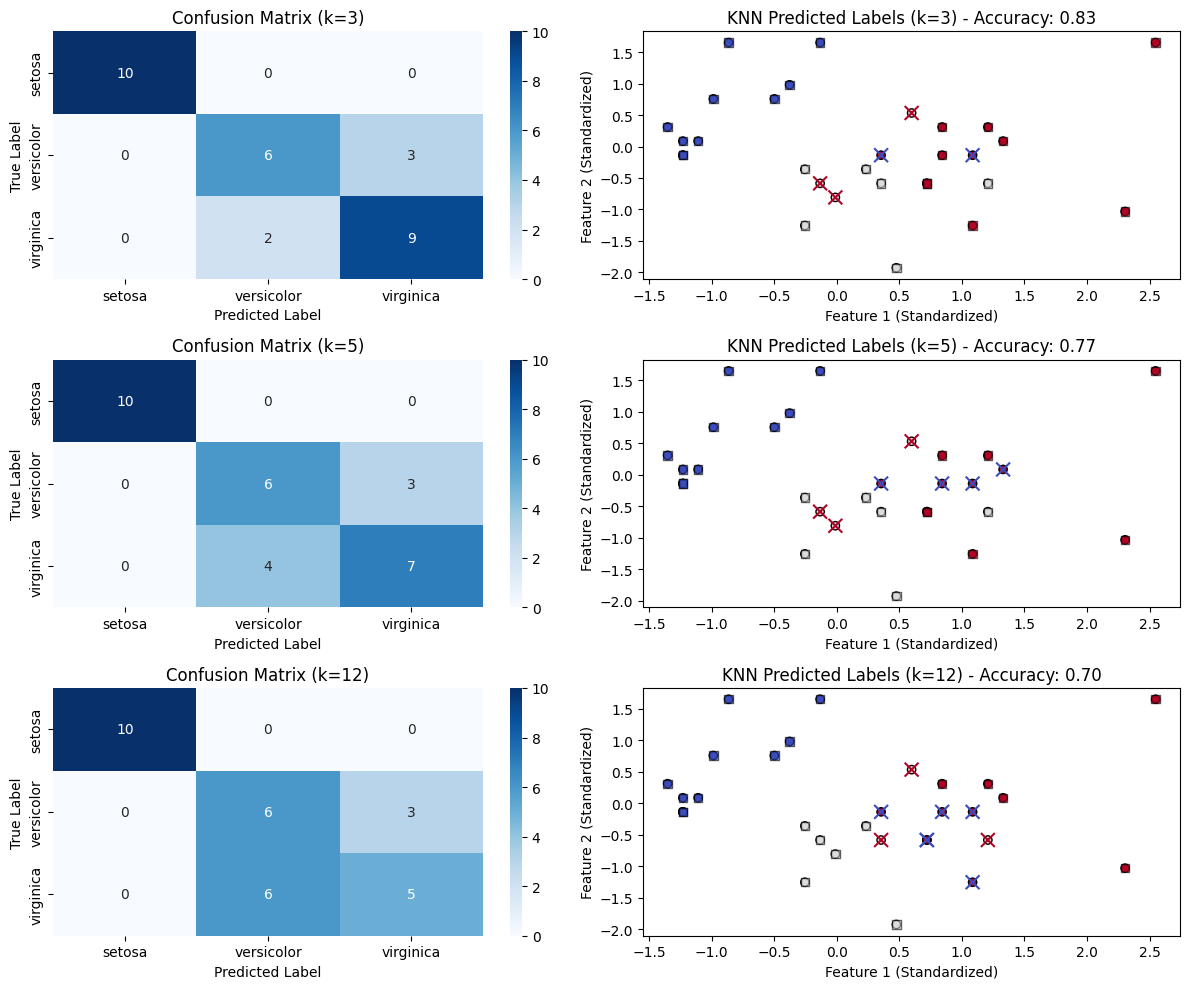

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only first two features for visualization
y = iris.target  # Labels

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for better KNN performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define different k values
k_values = [3, 5, 12]

# Create subplots (one row per k)
fig, axes = plt.subplots(len(k_values), 2, figsize=(12, 10))

# Loop through each k value
for i, k in enumerate(k_values):
    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict labels for test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'KNN Accuracy (k={k}): {accuracy:.2f}')

    # Print classification report
    print(f"\nClassification Report (k={k}):\n", classification_report(y_test, y_pred))

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix (k={k}):\n", conf_matrix)

    # 🔹 Plot Confusion Matrix Heatmap
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
                xticklabels=iris.target_names, yticklabels=iris.target_names, ax=axes[i, 0])
    axes[i, 0].set_xlabel("Predicted Label")
    axes[i, 0].set_ylabel("True Label")
    axes[i, 0].set_title(f"Confusion Matrix (k={k})")

    # 🔹 Scatter Plot of Predicted vs. True Labels
    correct = (y_pred == y_test)  # Boolean array for correct predictions
    axes[i, 1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label="True Labels", cmap="coolwarm", edgecolors="k")
    axes[i, 1].scatter(X_test[correct, 0], X_test[correct, 1], c=y_pred[correct], marker='s', label="Correct Predictions", cmap="coolwarm", edgecolors="black", alpha=0.6)
    axes[i, 1].scatter(X_test[~correct, 0], X_test[~correct, 1], c=y_pred[~correct], marker='x', label="Incorrect Predictions", cmap="coolwarm", s=100, edgecolors="black")

    axes[i, 1].set_xlabel("Feature 1 (Standardized)")
    axes[i, 1].set_ylabel("Feature 2 (Standardized)")
    axes[i, 1].set_title(f"KNN Predicted Labels (k={k}) - Accuracy: {accuracy:.2f}")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, r
import seaborn as sns
# Step 1: Load the dataset
df = pd.read_csv("C:/Users/SPDC3/Desktop/mdm/IRIS.csv")
# Print the first few rows of the dataset
print(df.head())
# Step 2: Prepare the features (X) and target (y)
X = df.iloc[:, [2, 3]].values # Features: PetalLength and PetalWidth
y = df.iloc[:, 4].values # Target: Species (string labels)
# Encode the target variable (species) into numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) # Convert labels to 0, 1, 2
# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random
# Step 4: Feature scaling (normalizing the data)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Step 5: Create and train the Logistic Regression model
classifier = LogisticRegression(random_state=0, multi_class='ovr', max_iter=200)
classifier.fit(X_train, y_train)
# Step 6: Make predictions on the test set
y_pred = classifier.predict(X_test)
# Step 7: Evaluate the model using confusion matrix and metrics
cm = confusion_matrix(y_test, y_pred)
# Calculate additional metrics for multiclass classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro') # or 'weighted'
recall = recall_score(y_test, y_pred, average='macro') # or 'weighted'
# Step 8: Print results
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (macro): {precision:.2f}")
print(f"Recall (macro): {recall:.2f}")
# Step 9: Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.cla
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Step 10: Decision Boundary Plot
# Create a meshgrid for plotting decision boundaries
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
# Generate grid of points (meshgrid)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
 np.arange(y_min, y_max, 0.1))
# Predict the class for each point in the meshgrid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
# Plot the training points
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='coolwarm
# Customize the plot
plt.title('Decision Boundary of Logistic Regression (Multiclass)')
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.legend(title='Classes', loc='best', labels=label_encoder.classes_)
plt.grid(True)
# Show the plot
plt.show()
# Step 11: Sigmoid Curve Visualization for each class
# Create range for PetalLength (using the first feature from X_train)
x_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 1000).reshape(-1
# We need to get the predicted probabilities for each point in the range
# Reshape X_range to match the shape expected by the classifier (keeping PetalWi
X_range_scaled = sc.transform(np.hstack([x_range, np.zeros_like(x_range)])) # S
# Get predicted probabilities for each class
probs = classifier.predict_proba(X_range_scaled)
# Plot the sigmoid curve for all classes
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(label_encoder.classes_):
 plt.plot(x_range, probs[:, i], label=f'Sigmoid Curve ({class_name})')
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Predicted Probability')
plt.title('Sigmoid Curves for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

Error: File not found! Check the file path.
